In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
%load_ext line_profiler
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from merf.utils import MERFDataGenerator
from merf.merf import MERF
from merf.viz import plot_merf_training_stats

# Test Data Generation

In [3]:
dgm = MERFDataGenerator(m=.6, sigma_b=np.sqrt(4.5), sigma_e=1)

In [4]:
num_clusters_each_size = 20
train_sizes = [1, 3, 5, 7, 9]
known_sizes = [9, 27, 45, 63, 81]
new_sizes = [10, 30, 50, 70, 90]

In [5]:
# Smaller set that can be used for debugging
# num_clusters_each_size = 1
# train_sizes = [1, 3]
# known_sizes = [9, 27]
# new_sizes = [10, 30]

In [6]:
train_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(train_sizes, num_clusters_each_size)
known_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(known_sizes, num_clusters_each_size)
new_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(new_sizes, num_clusters_each_size)

In [7]:
len(train_cluster_sizes), len(known_cluster_sizes), len(new_cluster_sizes)

(100, 100, 100)

In [8]:
train, test_known, test_new, training_cluster_ids, ptev, prev = dgm.generate_split_samples(train_cluster_sizes, known_cluster_sizes, new_cluster_sizes)

INFO     [utils.py:215] Drew 10000 samples from 200 clusters.
INFO     [utils.py:216] PTEV = 90.01361067498185, PREV = 49.92439657247505.


In [9]:
len(train), len(test_known), len(test_new)

(500, 4500, 5000)

In [10]:
train.head()

,y,X_0,X_1,X_2,Z,cluster
0,5.859431,-0.672569,1.133153,0.021227,1.0,0
10,0.864321,-0.321229,2.353018,0.516061,1.0,1
20,4.002324,-0.456631,1.179014,-0.213330,1.0,2
30,-2.208013,0.152059,-0.668405,0.631014,1.0,3
40,10.664375,1.391810,-2.163553,0.010924,1.0,4


# MERF Training

In [11]:
X_train = train[['X_0', 'X_1', 'X_2']]
Z_train = train[['Z']]
clusters_train = train['cluster']
y_train = train['y']

In [12]:
val = pd.concat([test_known, test_new])
X_val = val[['X_0', 'X_1', 'X_2']]
Z_val = val[['Z']]
clusters_val = val['cluster']
y_val = val['y']

## Default MERF

In [13]:
mrf = MERF(max_iterations=5)
mrf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:307] Training GLL is 83.6442695384124 at iteration 1.
INFO     [merf.py:307] Training GLL is 97.42916838654907 at iteration 2.
INFO     [merf.py:307] Training GLL is 67.25789032805976 at iteration 3.
INFO     [merf.py:307] Training GLL is 69.10800921237538 at iteration 4.
INFO     [merf.py:307] Training GLL is 79.12178461528913 at iteration 5.


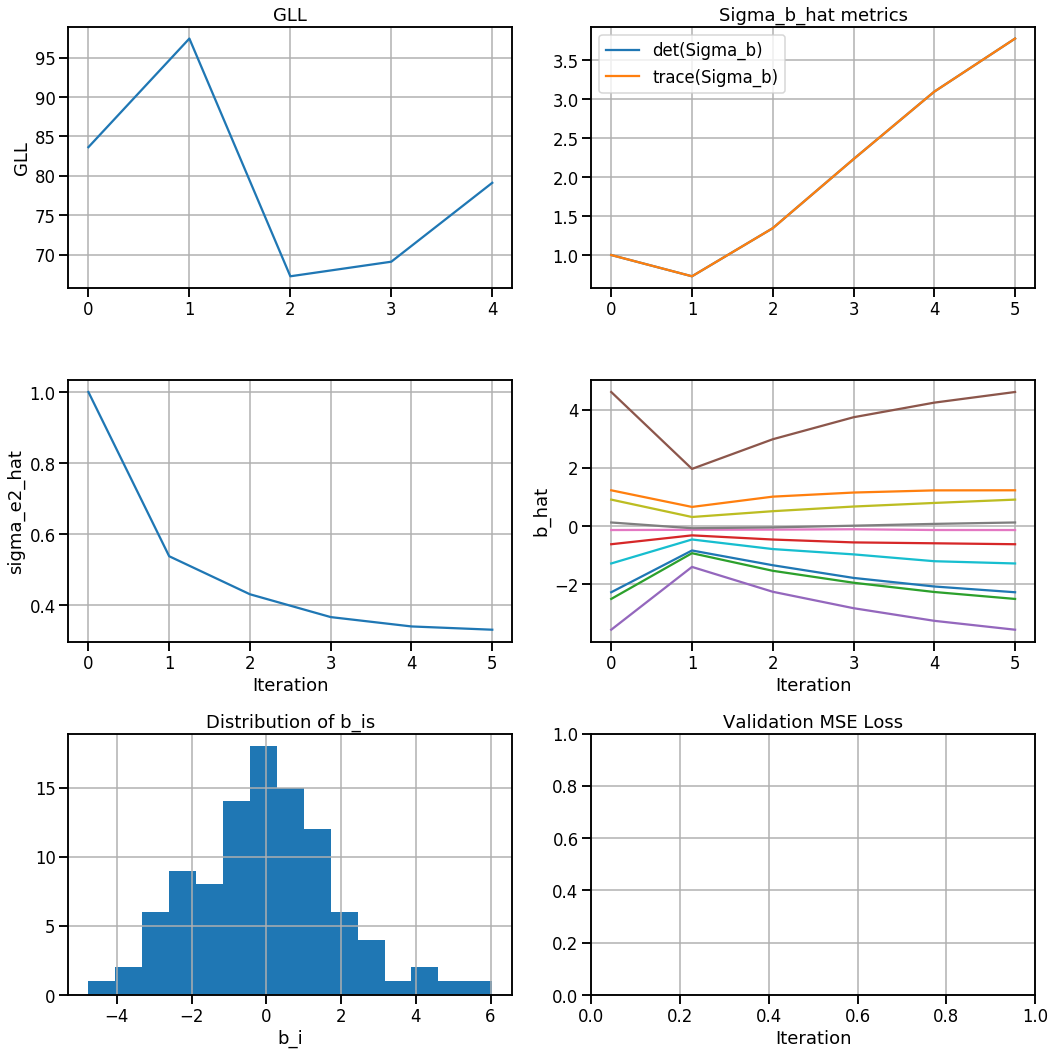

In [14]:
plot_merf_training_stats(mrf, num_clusters_to_plot=10)

In [15]:
# With validation loss
mrf = MERF(max_iterations=15)
mrf.fit(X_train, Z_train, clusters_train, y_train, X_val, Z_val, clusters_val, y_val)

INFO     [merf.py:307] Training GLL is 115.32816830273033 at iteration 1.
INFO     [merf.py:328] Validation MSE Loss is 6.087271100510921 at iteration 1.
INFO     [merf.py:307] Training GLL is 81.6650454036201 at iteration 2.
INFO     [merf.py:328] Validation MSE Loss is 5.147179878347706 at iteration 2.
INFO     [merf.py:307] Training GLL is 58.4111100551793 at iteration 3.
INFO     [merf.py:328] Validation MSE Loss is 4.626304994709961 at iteration 3.
INFO     [merf.py:307] Training GLL is 76.15319510069946 at iteration 4.
INFO     [merf.py:328] Validation MSE Loss is 4.322940662820835 at iteration 4.
INFO     [merf.py:307] Training GLL is 86.27916903966894 at iteration 5.
INFO     [merf.py:328] Validation MSE Loss is 4.1734666263697635 at iteration 5.
INFO     [merf.py:307] Training GLL is 96.6210470479295 at iteration 6.
INFO     [merf.py:328] Validation MSE Loss is 4.041401536845248 at iteration 6.
INFO     [merf.py:307] Training GLL is 93.26961811321195 at iteration 7.
INFO     [

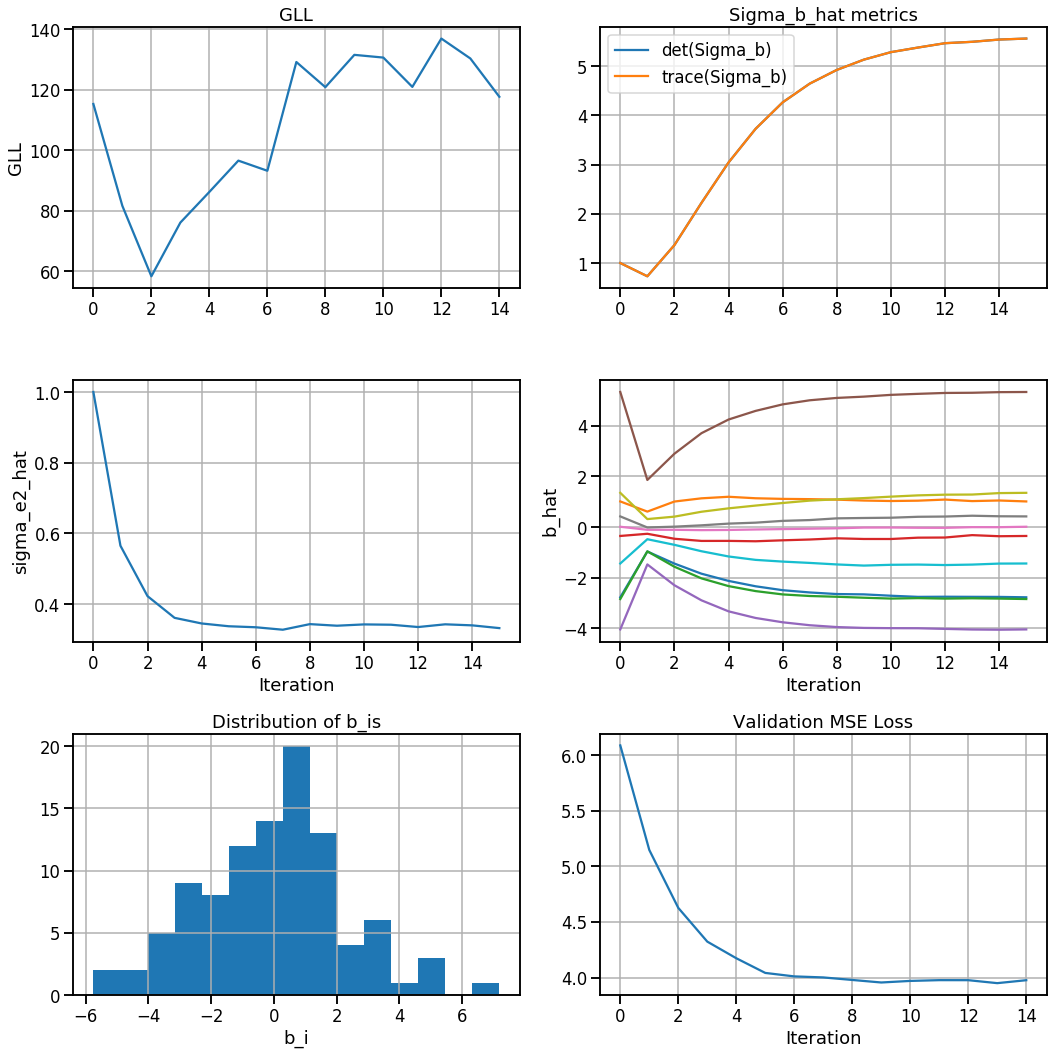

In [16]:
plot_merf_training_stats(mrf, num_clusters_to_plot=10)

## LightGBM

In [17]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

In [18]:
mrf_lgbm = MERF(lgbm, max_iterations=15)
mrf_lgbm.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:307] Training GLL is 594.9651984895437 at iteration 1.
INFO     [merf.py:307] Training GLL is 543.6950907190325 at iteration 2.
INFO     [merf.py:307] Training GLL is 486.38807737513224 at iteration 3.
INFO     [merf.py:307] Training GLL is 463.0249746930428 at iteration 4.
INFO     [merf.py:307] Training GLL is 468.26308017454613 at iteration 5.
INFO     [merf.py:307] Training GLL is 460.5194672699555 at iteration 6.
INFO     [merf.py:307] Training GLL is 470.37374066878334 at iteration 7.
INFO     [merf.py:307] Training GLL is 453.39275473887915 at iteration 8.
INFO     [merf.py:307] Training GLL is 470.736385949653 at iteration 9.
INFO     [merf.py:307] Training GLL is 477.7560702403944 at iteration 10.
INFO     [merf.py:307] Training GLL is 474.4152345626981 at iteration 11.
INFO     [merf.py:307] Training GLL is 458.20172763659946 at iteration 12.
INFO     [merf.py:307] Training GLL is 488.73238742602524 at iteration 13.
INFO     [merf.py:307] Training GLL is 472

In [19]:
# With validation loss
mrf_lgbm = MERF(lgbm, max_iterations=15)
mrf_lgbm.fit(X_train, Z_train, clusters_train, y_train, X_val, Z_val, clusters_val, y_val)

INFO     [merf.py:307] Training GLL is 594.9651984895437 at iteration 1.
INFO     [merf.py:328] Validation MSE Loss is 5.785325671558889 at iteration 1.
INFO     [merf.py:307] Training GLL is 543.6950907190325 at iteration 2.
INFO     [merf.py:328] Validation MSE Loss is 4.756493260594394 at iteration 2.
INFO     [merf.py:307] Training GLL is 486.38807737513224 at iteration 3.
INFO     [merf.py:328] Validation MSE Loss is 4.316498035566344 at iteration 3.
INFO     [merf.py:307] Training GLL is 463.0249746930428 at iteration 4.
INFO     [merf.py:328] Validation MSE Loss is 4.170660762349943 at iteration 4.
INFO     [merf.py:307] Training GLL is 468.26308017454613 at iteration 5.
INFO     [merf.py:328] Validation MSE Loss is 4.108997636303168 at iteration 5.
INFO     [merf.py:307] Training GLL is 460.5194672699555 at iteration 6.
INFO     [merf.py:328] Validation MSE Loss is 4.110988747685258 at iteration 6.
INFO     [merf.py:307] Training GLL is 470.37374066878334 at iteration 7.
INFO  

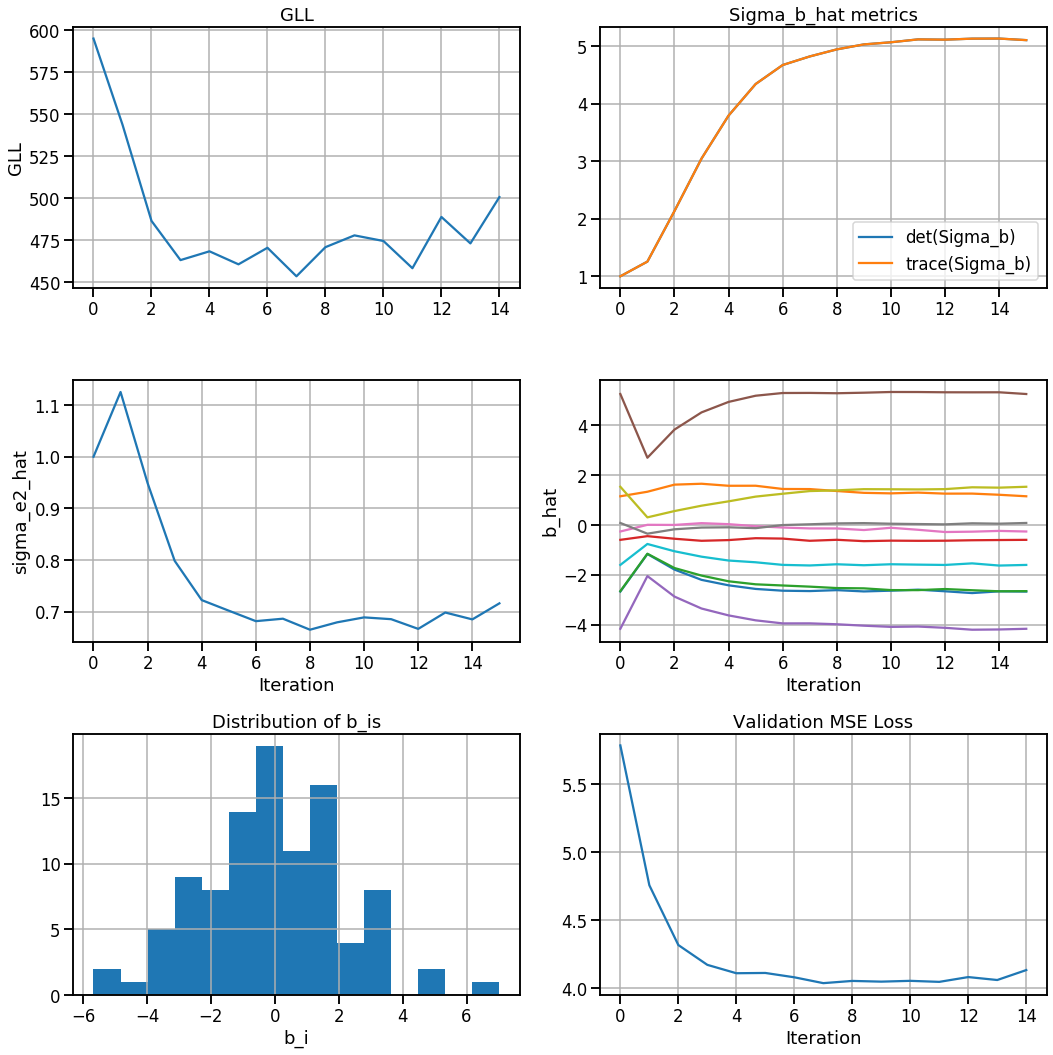

In [20]:
plot_merf_training_stats(mrf_lgbm, num_clusters_to_plot=10)

# MERF Prediction

In [321]:
X_known = test_known[['X_0', 'X_1', 'X_2']]
Z_known = test_known[['Z']]
clusters_known = test_known['cluster']
y_known = test_known['y']

In [322]:
y_hat_known = mrf.predict(X_known, Z_known, clusters_known)
y_hat_known

array([2.84268247, 1.85203947, 2.6007508 , ..., 3.49492302, 2.71621082,
       4.64021406])

In [323]:
assert len(y_hat_known) == len(y_known)

In [324]:
X_new = test_new[['X_0', 'X_1', 'X_2']]
Z_new = test_new[['Z']]
clusters_new = test_new['cluster']
y_new = test_new['y']

In [325]:
y_hat_new = mrf.predict(X_new, Z_new, clusters_new)
y_hat_new

array([2.15021046, 2.53198837, 2.09549374, ..., 0.43302719, 3.55778436,
       4.23779162])

In [326]:
assert len(y_hat_new) == len(y_new)

# Inspect Trained Random Forest

Specifically look at the partial dependence plots and feature importance (using SHAP). 

In [301]:
mrf.trained_fe_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [302]:
from sklearn.inspection import plot_partial_dependence

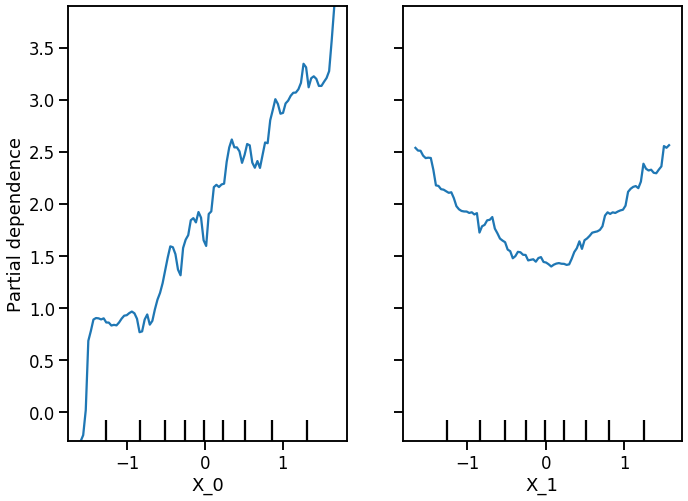

In [303]:
features = [0, 1]
plot_partial_dependence(mrf.trained_fe_model, X_known, features) 

In [304]:
import shap

In [135]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(mrf.trained_fe_model)
shap_values = explainer.shap_values(X_known)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


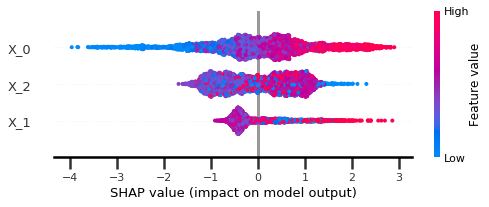

In [136]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_known)

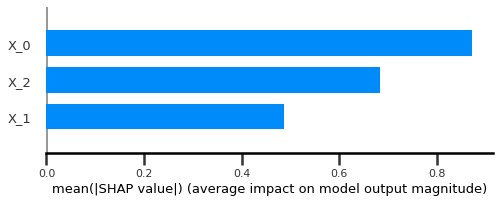

In [137]:
shap.summary_plot(shap_values, X_known, plot_type="bar")


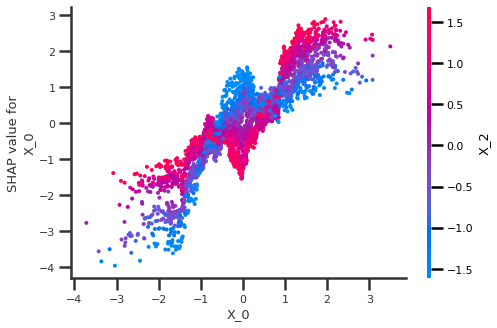

In [138]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('X_0', shap_values, X_known)

# MERF vs. Random Forest on Fixed Effects

In [ ]:
# Train and test using classic random forest. 
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_hat_known_rf = rf.predict(X_known)

In [ ]:
pmse_known_rf = np.mean((y_known - y_hat_known_rf) ** 2)
pmse_known_rf

In [ ]:
y_hat_known_merf = mrf.predict(X_known, Z_known, clusters_known)

In [ ]:
pmse_known_merf = np.mean((y_known - y_hat_known_merf) ** 2)
pmse_known_merf

In [ ]:
rd_known = 100 * (pmse_known_rf - pmse_known_merf) / pmse_known_rf
rd_known

In [ ]:
y_hat_new_rf = rf.predict(X_new)

In [ ]:
pmse_new_rf = np.mean((y_new - y_hat_new_rf) ** 2)
pmse_new_rf

In [ ]:
y_hat_new_merf = mrf.predict(X_new, Z_new, clusters_new)

In [ ]:
pmse_new_merf = np.mean((y_new - y_hat_new_merf) ** 2)
pmse_new_merf

In [ ]:
rd_new = 100 * (pmse_new_rf - pmse_new_merf) / pmse_new_rf
rd_new

# MERF vs Random Forest with OHE Cluster Ids

In [ ]:
rf_ohe = RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [ ]:
categories = np.sort(clusters_train.unique())

In [ ]:
clusters_train_prime = pd.Categorical(clusters_train, categories=categories)

In [ ]:
X_ohe = pd.get_dummies(clusters_train_prime, prefix='cluster')

In [ ]:
X_ohe.head()

In [ ]:
X_train_ohe = pd.merge(X_train, X_ohe, left_index=True, right_index=True)

In [ ]:
rf_ohe.fit(X_train_ohe, y_train)

In [ ]:
clusters_known_prime = pd.Categorical(clusters_known, categories=categories)

In [ ]:
X_known_ohe = pd.get_dummies(clusters_known_prime, prefix='cluster')

In [ ]:
X_known_ohe.head()

In [ ]:
X_known_w_ohe = pd.merge(X_known, X_known_ohe, left_index=True, right_index=True)

In [ ]:
y_hat_known_rf_ohe = rf_ohe.predict(X_known_w_ohe)

In [ ]:
mse_known_rf_ohe = np.mean((y_known - y_hat_known_rf_ohe) ** 2)
mse_known_rf_ohe

In [ ]:
clusters_new_prime = pd.Categorical(clusters_new, categories=categories)

In [ ]:
X_new_ohe = pd.get_dummies(clusters_new_prime, prefix='cluster')

In [ ]:
X_new_ohe.head()

In [ ]:
X_new_w_ohe = pd.merge(X_new, X_new_ohe, left_index=True, right_index=True)

In [ ]:
y_hat_new_rf_ohe = rf_ohe.predict(X_new_w_ohe)

In [ ]:
mse_new_rf_ohe = np.mean((y_new - y_hat_new_rf_ohe) ** 2)
mse_new_rf_ohe